In [1]:
from bs4 import BeautifulSoup 
import requests 
from csv import writer
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\mzuba\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


## Data scraping/collecting 
###### https://www.nba.com

In [2]:
driver = webdriver.Firefox()

##### Analyzing traditional box score of two teams in the playoffs

In [3]:
url = r"https://www.nba.com/stats/teams/boxscores-traditional/?Season=2021-22&SeasonType=Playoffs"
driver.get(url)

In [5]:
select = Select(driver.find_element_by_xpath(r"/html/body/main/div/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select"))

<ipython-input-5-b4dd7979dea8>:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  select = Select(driver.find_element_by_xpath(r"/html/body/main/div/div/div[2]/div/div/nba-stat-table/div[1]/div/div/select"))


In [6]:
select.select_by_index(0)

In [7]:
src = driver.page_source
parser = BeautifulSoup(src, "lxml")
table = parser.find("div", attrs = {"class": "nba-stat-table__overflow"})
headers = table.findAll('th')
headerlist = [h.text.strip() for h in headers[1:]]
headerlist

['Match\xa0Up',
 'Game\xa0Date',
 'Season',
 'W/L',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'PF',
 '+/-']

###### 166 Playoff games have been played so far in 2022

In [8]:
rows = table.find_all('tr')[1:]
len(rows)

166

In [9]:
player_stats = [[td.getText().strip() for td in rows[i].find_all('td')[1:]] for i in range(len(rows))]
player_stats[0]

['GSW vs. BOS',
 '06/05/2022',
 '',
 'W',
 '48',
 '107',
 '39',
 '86',
 '45.3',
 '15',
 '37',
 '40.5',
 '14',
 '20',
 '70.0',
 '6',
 '36',
 '42',
 '25',
 '12',
 '15',
 '2',
 '17',
 '19']

In [10]:
df_stats = pd.DataFrame(player_stats, columns=headerlist)
df_stats.head()

,Match Up,Game Date,Season,W/L,MIN,PTS,FGM,FGA,FG%,3PM,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,GSW vs. BOS,06/05/2022,,W,48,107,39,86,45.3,15,...,70.0,6,36,42,25,12,15,2,17,19
1,BOS @ GSW,06/05/2022,,L,48,88,30,80,37.5,15,...,76.5,6,37,43,24,19,5,7,18,-19
2,BOS @ GSW,06/02/2022,,W,48,120,43,85,50.6,21,...,81.3,7,32,39,33,13,7,6,13,12
3,GSW vs. BOS,06/02/2022,,L,48,108,39,88,44.3,19,...,73.3,12,27,39,24,14,8,6,16,-12
4,BOS @ MIA,05/29/2022,,W,48,100,35,85,41.2,11,...,79.2,10,41,51,22,13,4,6,26,4


In [11]:
df_stats = df_stats.drop(['Season'], axis=1)
df_stats.head()

,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,GSW vs. BOS,06/05/2022,W,48,107,39,86,45.3,15,37,...,70.0,6,36,42,25,12,15,2,17,19
1,BOS @ GSW,06/05/2022,L,48,88,30,80,37.5,15,37,...,76.5,6,37,43,24,19,5,7,18,-19
2,BOS @ GSW,06/02/2022,W,48,120,43,85,50.6,21,41,...,81.3,7,32,39,33,13,7,6,13,12
3,GSW vs. BOS,06/02/2022,L,48,108,39,88,44.3,19,45,...,73.3,12,27,39,24,14,8,6,16,-12
4,BOS @ MIA,05/29/2022,W,48,100,35,85,41.2,11,32,...,79.2,10,41,51,22,13,4,6,26,4


## Data visualization/analysis

In [12]:
df_stats

,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,GSW vs. BOS,06/05/2022,W,48,107,39,86,45.3,15,37,...,70.0,6,36,42,25,12,15,2,17,19
1,BOS @ GSW,06/05/2022,L,48,88,30,80,37.5,15,37,...,76.5,6,37,43,24,19,5,7,18,-19
2,BOS @ GSW,06/02/2022,W,48,120,43,85,50.6,21,41,...,81.3,7,32,39,33,13,7,6,13,12
3,GSW vs. BOS,06/02/2022,L,48,108,39,88,44.3,19,45,...,73.3,12,27,39,24,14,8,6,16,-12
4,BOS @ MIA,05/29/2022,W,48,100,35,85,41.2,11,32,...,79.2,10,41,51,22,13,4,6,26,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,DEN @ GSW,04/16/2022,L,48,107,43,93,46.2,11,35,...,76.9,9,26,35,26,11,8,3,22,-16
162,MEM vs. MIN,04/16/2022,L,48,117,39,86,45.3,7,27,...,74.4,8,27,35,25,12,7,8,24,-13
163,PHI vs. TOR,04/16/2022,W,48,131,43,84,51.2,16,32,...,85.3,10,29,39,29,4,6,4,18,20
164,GSW vs. DEN,04/16/2022,W,48,123,43,82,52.4,16,35,...,72.4,10,31,41,33,13,5,8,22,16


##### Subsetting the dataset to only view playoff games of Celtics vs Warriors for their upcomming matchup in NBA finals

In [13]:
nba_final_df = df_stats
nba_final_df

,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,GSW vs. BOS,06/05/2022,W,48,107,39,86,45.3,15,37,...,70.0,6,36,42,25,12,15,2,17,19
1,BOS @ GSW,06/05/2022,L,48,88,30,80,37.5,15,37,...,76.5,6,37,43,24,19,5,7,18,-19
2,BOS @ GSW,06/02/2022,W,48,120,43,85,50.6,21,41,...,81.3,7,32,39,33,13,7,6,13,12
3,GSW vs. BOS,06/02/2022,L,48,108,39,88,44.3,19,45,...,73.3,12,27,39,24,14,8,6,16,-12
4,BOS @ MIA,05/29/2022,W,48,100,35,85,41.2,11,32,...,79.2,10,41,51,22,13,4,6,26,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,DEN @ GSW,04/16/2022,L,48,107,43,93,46.2,11,35,...,76.9,9,26,35,26,11,8,3,22,-16
162,MEM vs. MIN,04/16/2022,L,48,117,39,86,45.3,7,27,...,74.4,8,27,35,25,12,7,8,24,-13
163,PHI vs. TOR,04/16/2022,W,48,131,43,84,51.2,16,32,...,85.3,10,29,39,29,4,6,4,18,20
164,GSW vs. DEN,04/16/2022,W,48,123,43,82,52.4,16,35,...,72.4,10,31,41,33,13,5,8,22,16


In [14]:
nba_final_df = df_stats[df_stats['Match\xa0Up'].str.startswith('BO') | df_stats['Match\xa0Up'].str.endswith('OS') | 
df_stats['Match\xa0Up'].str.startswith('GS') | df_stats['Match\xa0Up'].str.endswith('SW')]

In [15]:
nba_final_df

,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,GSW vs. BOS,06/05/2022,W,48,107,39,86,45.3,15,37,...,70.0,6,36,42,25,12,15,2,17,19
1,BOS @ GSW,06/05/2022,L,48,88,30,80,37.5,15,37,...,76.5,6,37,43,24,19,5,7,18,-19
2,BOS @ GSW,06/02/2022,W,48,120,43,85,50.6,21,41,...,81.3,7,32,39,33,13,7,6,13,12
3,GSW vs. BOS,06/02/2022,L,48,108,39,88,44.3,19,45,...,73.3,12,27,39,24,14,8,6,16,-12
4,BOS @ MIA,05/29/2022,W,48,100,35,85,41.2,11,32,...,79.2,10,41,51,22,13,4,6,26,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,GSW vs. DEN,04/18/2022,W,48,126,46,84,54.8,17,40,...,70.8,6,29,35,27,9,10,8,20,20
156,BOS vs. BKN,04/17/2022,W,48,115,42,89,47.2,12,33,...,79.2,14,29,43,24,15,12,5,24,1
157,BKN @ BOS,04/17/2022,L,48,114,42,78,53.8,11,24,...,79.2,5,24,29,20,16,12,6,26,-1
161,DEN @ GSW,04/16/2022,L,48,107,43,93,46.2,11,35,...,76.9,9,26,35,26,11,8,3,22,-16


In [16]:
boston_df = nba_final_df[nba_final_df['Match\xa0Up'].str.startswith('BO')]
gsw_df = nba_final_df[nba_final_df['Match\xa0Up'].str.startswith('GS')]

In [17]:
boston_df

,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
1,BOS @ GSW,06/05/2022,L,48,88,30,80,37.5,15,37,...,76.5,6,37,43,24,19,5,7,18,-19
2,BOS @ GSW,06/02/2022,W,48,120,43,85,50.6,21,41,...,81.3,7,32,39,33,13,7,6,13,12
4,BOS @ MIA,05/29/2022,W,48,100,35,85,41.2,11,32,...,79.2,10,41,51,22,13,4,6,26,4
7,BOS vs. MIA,05/27/2022,L,48,103,32,72,44.4,11,33,...,90.3,6,28,34,22,18,10,4,28,-8
10,BOS @ MIA,05/25/2022,W,48,93,33,71,46.5,10,33,...,73.9,6,40,46,24,15,5,7,19,13
15,BOS vs. MIA,05/23/2022,W,48,102,31,78,39.7,8,34,...,84.2,14,46,60,21,11,4,11,15,20
19,BOS vs. MIA,05/21/2022,L,48,103,34,70,48.6,12,32,...,76.7,9,35,44,21,24,2,7,21,-6
23,BOS @ MIA,05/19/2022,W,48,127,43,84,51.2,20,40,...,91.3,8,33,41,28,10,8,5,21,25
26,BOS @ MIA,05/17/2022,L,48,107,36,79,45.6,11,34,...,75.0,8,30,38,22,16,8,8,23,-11
28,BOS vs. MIL,05/15/2022,W,48,109,37,88,42.0,22,55,...,72.2,8,40,48,29,14,5,7,19,28


In [18]:
gsw_df

,Match Up,Game Date,W/L,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,GSW vs. BOS,06/05/2022,W,48,107,39,86,45.3,15,37,...,70.0,6,36,42,25,12,15,2,17,19
3,GSW vs. BOS,06/02/2022,L,48,108,39,88,44.3,19,45,...,73.3,12,27,39,24,14,8,6,16,-12
9,GSW vs. DAL,05/26/2022,W,48,120,45,88,51.1,14,36,...,100,14,37,51,36,11,6,3,20,10
13,GSW @ DAL,05/24/2022,L,48,109,41,84,48.8,10,28,...,65.4,6,36,42,26,8,5,4,18,-10
17,GSW @ DAL,05/22/2022,W,48,109,38,81,46.9,11,32,...,88.0,14,33,47,28,13,5,1,23,9
20,GSW vs. DAL,05/20/2022,W,48,126,46,82,56.1,14,28,...,80.0,8,35,43,33,16,4,2,26,9
25,GSW vs. DAL,05/18/2022,W,48,112,46,82,56.1,10,29,...,62.5,7,44,51,24,15,8,7,22,25
34,GSW vs. MEM,05/13/2022,W,48,110,41,104,39.4,20,53,...,72.7,25,45,70,24,19,3,10,17,14
42,GSW @ MEM,05/11/2022,L,48,95,36,80,45.0,14,39,...,69.2,4,33,37,22,22,3,5,23,-39
49,GSW vs. MEM,05/09/2022,W,48,101,36,90,40.0,9,37,...,90.9,10,44,54,25,16,6,7,15,3


#### What do each of these teams have to do to win the Nba finals?

###### Boston has won 13 out of their 20 games in playoffs. Their win ratio is 65% 

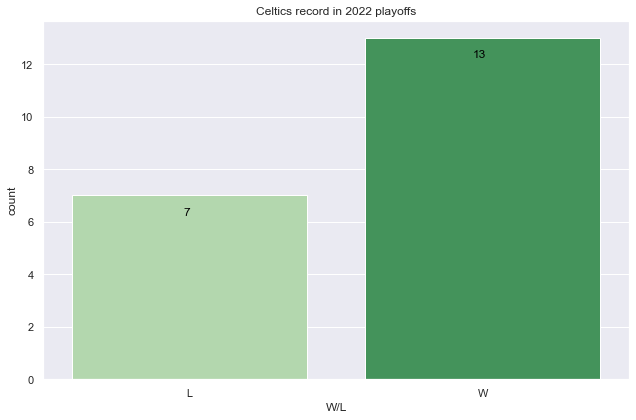

In [79]:
# Lets first look at the amount of games each team won in playoffs
ax = sns.countplot(x='W/L', data=boston_df, palette="Greens")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.39, p.get_height()), ha='center', va='top', color='black', size=12)
ax.set_title('Celtics record in 2022 playoffs')
sns.set(rc={'figure.figsize':(8,5)})

###### Warriors have won 13 out of their 18 games in playoffs. Their win ratio is 72% 

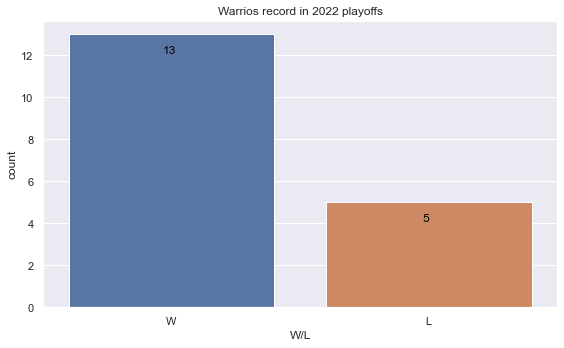

In [81]:
# Lets first look at the amount of games each team won in playoffs
ax = sns.countplot(x='W/L', data=gsw_df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.39, p.get_height()), ha='center', va='top', color='black', size=12)
ax.set_title('Warrios record in 2022 playoffs')
sns.set(rc={'figure.figsize':(8,5)})

In [21]:
headerlist

['Match\xa0Up',
 'Game\xa0Date',
 'Season',
 'W/L',
 'MIN',
 'PTS',
 'FGM',
 'FGA',
 'FG%',
 '3PM',
 '3PA',
 '3P%',
 'FTM',
 'FTA',
 'FT%',
 'OREB',
 'DREB',
 'REB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'PF',
 '+/-']

In [22]:
boston_df['3P%'] = pd.to_numeric(boston_df['3P%'])
boston_df['PTS'] = pd.to_numeric(boston_df['PTS'])
boston_df['3PM'] = pd.to_numeric(boston_df['3PM'])
boston_df['FGM'] = pd.to_numeric(boston_df['FGM'])
boston_df['FG%'] = pd.to_numeric(boston_df['FG%'])
boston_df['FT%'] = pd.to_numeric(boston_df['FT%'])
boston_df['FTM'] = pd.to_numeric(boston_df['FTM'])
boston_df['TOV'] = pd.to_numeric(boston_df['TOV'])
boston_df['OREB'] = pd.to_numeric(boston_df['OREB'])
boston_df['DREB'] = pd.to_numeric(boston_df['DREB'])
boston_df['REB'] = pd.to_numeric(boston_df['REB'])
boston_df['STL'] = pd.to_numeric(boston_df['STL'])
boston_df['BLK'] = pd.to_numeric(boston_df['BLK'])
boston_df['PF'] = pd.to_numeric(boston_df['PF'])
boston_df.dtypes

<ipython-input-22-595adae23d13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['3P%'] = pd.to_numeric(boston_df['3P%'])
<ipython-input-22-595adae23d13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df['PTS'] = pd.to_numeric(boston_df['PTS'])
<ipython-input-22-595adae23d13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

Match Up      object
Game Date     object
W/L           object
MIN           object
PTS            int64
FGM            int64
FGA           object
FG%          float64
3PM            int64
3PA           object
3P%          float64
FTM            int64
FTA           object
FT%          float64
OREB           int64
DREB           int64
REB            int64
AST           object
TOV            int64
STL            int64
BLK            int64
PF             int64
+/-           object
dtype: object

In [78]:
gsw_df['3P%'] = pd.to_numeric(gsw_df['3P%'])
gsw_df['3PM'] = pd.to_numeric(gsw_df['3PM'])
gsw_df['PTS'] = pd.to_numeric(gsw_df['PTS'])
gsw_df['FG%'] = pd.to_numeric(gsw_df['FG%'])
gsw_df['FGM'] = pd.to_numeric(gsw_df['FGM'])
gsw_df['FTM'] = pd.to_numeric(gsw_df['FTM'])
gsw_df['FT%'] = pd.to_numeric(gsw_df['FT%'])
gsw_df['TOV'] = pd.to_numeric(gsw_df['TOV'])
gsw_df['OREB'] = pd.to_numeric(gsw_df['OREB'])
gsw_df['DREB'] = pd.to_numeric(gsw_df['DREB'])
gsw_df['REB'] = pd.to_numeric(gsw_df['REB'])
gsw_df['STL'] = pd.to_numeric(gsw_df['STL'])
gsw_df['BLK'] = pd.to_numeric(gsw_df['BLK'])
gsw_df['PF'] = pd.to_numeric(gsw_df['PF'])
gsw_df.dtypes

<ipython-input-78-83be22798500>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsw_df['3P%'] = pd.to_numeric(gsw_df['3P%'])
<ipython-input-78-83be22798500>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gsw_df['3PM'] = pd.to_numeric(gsw_df['3PM'])
<ipython-input-78-83be22798500>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

Match Up      object
Game Date     object
W/L           object
MIN           object
PTS            int64
FGM            int64
FGA           object
FG%          float64
3PM            int64
3PA           object
3P%          float64
FTM            int64
FTA           object
FT%          float64
OREB           int64
DREB           int64
REB            int64
AST           object
TOV            int64
STL            int64
BLK            int64
PF             int64
+/-           object
dtype: object

#### How can Celtics or Warrios win the NBA finals?

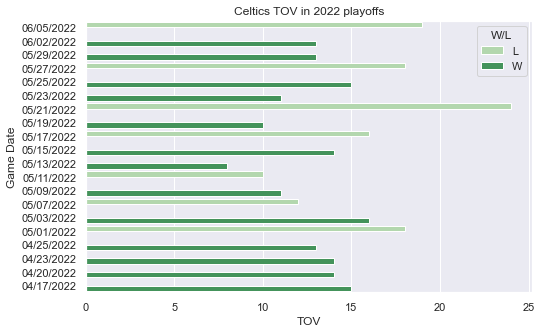

In [24]:
ax = sns.barplot(x= 'TOV', y="Game\xa0Date", hue="W/L", data=boston_df, palette = "Greens").set(title='Celtics TOV in 2022 playoffs')
sns.set(rc={'figure.figsize':(8,5)})

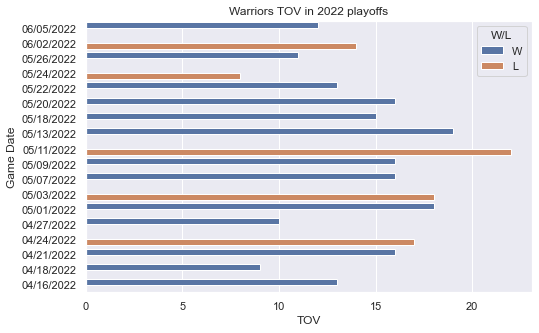

In [25]:
ax = sns.barplot(x= 'TOV', y="Game\xa0Date", hue="W/L", data=gsw_df).set(title='Warriors TOV in 2022 playoffs')
sns.set(rc={'figure.figsize':(8,5)})

###### As seen from the plots above, both teams have lost most of their games when being careless with the ball. It is important for the defense of both teams to throw active hands on the ball to try and force timely turnovers. 

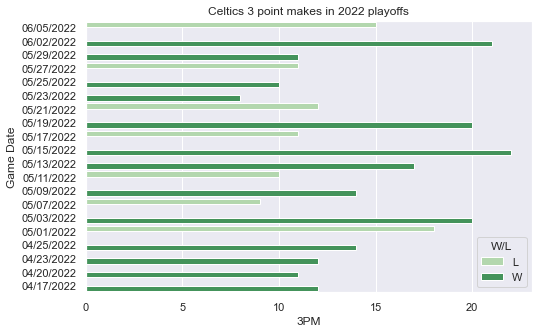

In [26]:
ax = sns.barplot(x= '3PM', y="Game\xa0Date", hue="W/L", data=boston_df, palette = "Greens").set(title='Celtics 3 point makes in 2022 playoffs')
sns.set(rc={'figure.figsize':(8,5)})

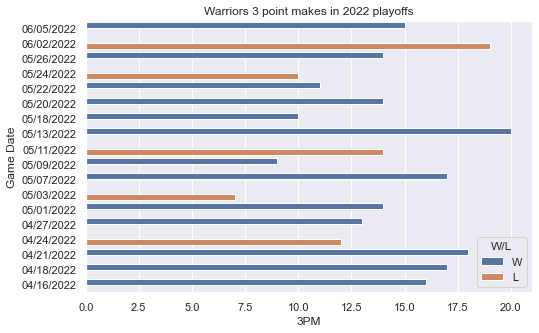

In [27]:
ax = sns.barplot(x= '3PM', y="Game\xa0Date", hue="W/L", data=gsw_df).set(title='Warriors 3 point makes in 2022 playoffs')
sns.set(rc={'figure.figsize':(8,5)})

###### 3 point makes impacted the outcome of game throughout the playoffs for both teams.....except when they faced each other and broke the pattern by making almost the same amount of threes.

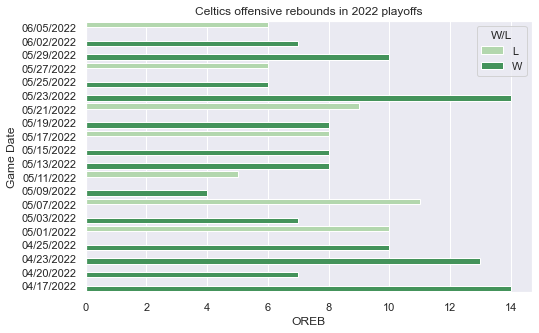

In [28]:
#plt.rcParams["figure.figsize"] = [12, 7]
#plt.rcParams["figure.autolayout"] = True
#f, axes = plt.subplots(1, 2)
ax = sns.barplot(x= 'OREB', y="Game\xa0Date", hue="W/L", data=boston_df, palette = "Greens").set(title='Celtics offensive rebounds in 2022 playoffs')
sns.set(rc={'figure.figsize':(8,5)})

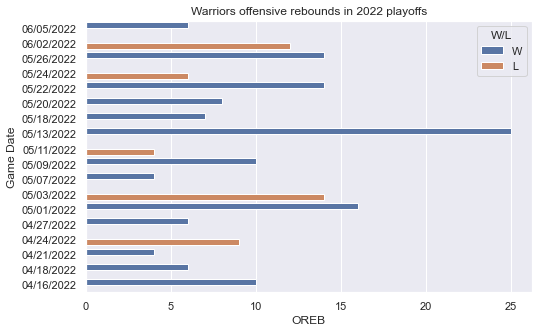

In [29]:
#plt.rcParams["figure.figsize"] = [12, 7]
#plt.rcParams["figure.autolayout"] = True
#f, axes = plt.subplots(1, 2)
sns.barplot(x= 'OREB', y="Game\xa0Date", hue="W/L", data=gsw_df).set(title='Warriors offensive rebounds in 2022 playoffs')
sns.set(rc={'figure.figsize':(8,5)})

###### Another strategy these two teams can use is playing the lineups that can acquire them offensive rebounds = second chance pts oppertunity = Wins. 

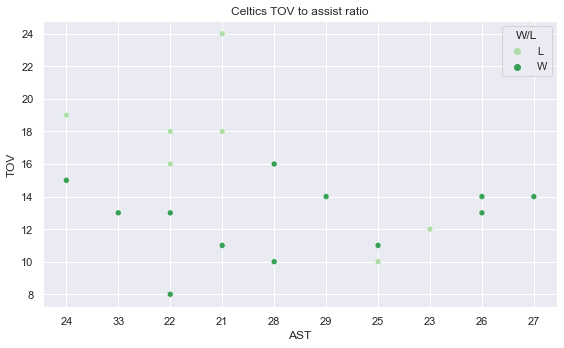

In [59]:
ax = sns.scatterplot(data=boston_df, x="AST", y="TOV", hue='W/L', palette="Greens").set(title='Celtics TOV to assist ratio')
sns.set(rc={'figure.figsize':(8,5)})

###### Celtics have lost all the games where their turnovers exceeded 16

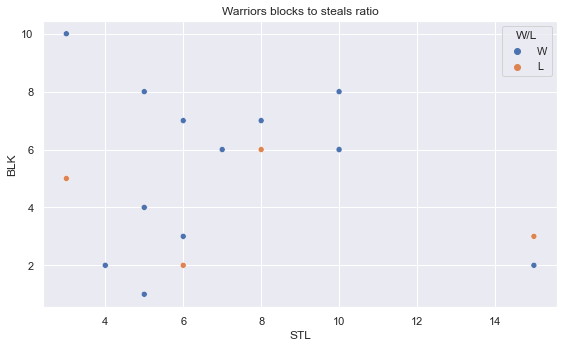

In [69]:
ax = sns.scatterplot(data=gsw_df, x="STL", y="BLK", hue='W/L').set(title='Warriors blocks to steals ratio')
sns.set(rc={'figure.figsize':(8,5)})

###### Defensive stops is key for warriors because they have won most of their games when exceeding 6 blocks 

In [30]:
labels_corr = ['PTS',
 'FGM',
 'FG%',
 '3PM',
 '3P%',
 'FTM',
 'FT%',
 'OREB',
 'DREB',
 'AST',
 'TOV',
 'STL',
 'BLK',
 'PF', 
 'W/L']
 
df_corr_boston = pd.DataFrame(boston_df,columns=labels_corr)
df_corr_gsw = pd.DataFrame(gsw_df,columns=labels_corr)
df_corr_gsw.head()


,PTS,FGM,FG%,3PM,3P%,FTM,FT%,OREB,DREB,AST,TOV,STL,BLK,PF,W/L
0,107,39,45.3,15,40.5,14,70.0,6,36,25,12,15,2,17,W
3,108,39,44.3,19,42.2,11,73.3,12,27,24,14,8,6,16,L
9,120,45,51.1,14,38.9,16,100.0,14,37,36,11,6,3,20,W
13,109,41,48.8,10,35.7,17,65.4,6,36,26,8,5,4,18,L
17,109,38,46.9,11,34.4,22,88.0,14,33,28,13,5,1,23,W


Text(0.5, 1.0, 'Celtics Stats Correlation with Points')

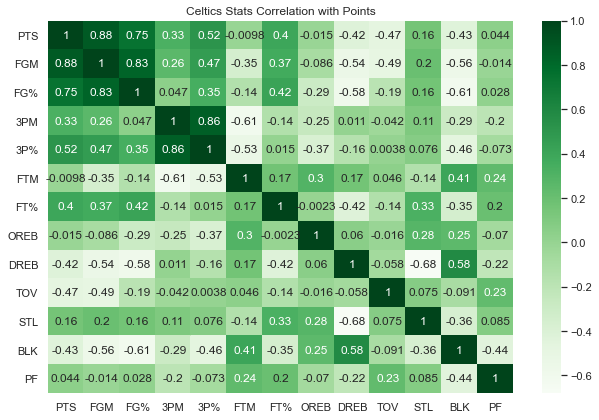

In [72]:
plt.rcParams["figure.figsize"] = [9, 6]
plt.rcParams["figure.autolayout"] = True
corrMatrix = df_corr_boston.corr()
ax = sns.heatmap(corrMatrix, annot=True, cmap="Greens")
ax.set_title('Celtics Stats Correlation with Points')

Text(0.5, 1.0, 'Warriors Stats Correlation with Points')

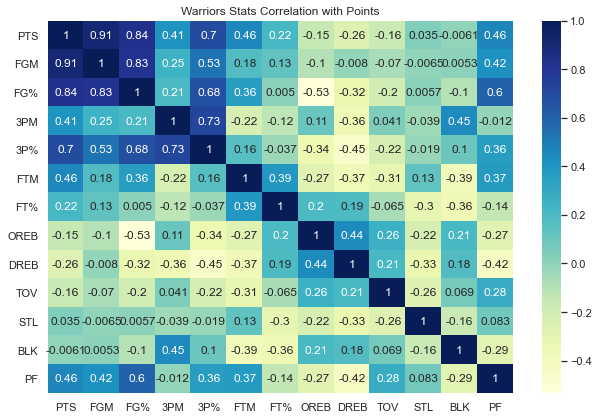

In [76]:
plt.rcParams["figure.figsize"] = [9, 6]
plt.rcParams["figure.autolayout"] = True
corrMatrix = df_corr_gsw.corr()
ax = sns.heatmap(corrMatrix, annot=True, cmap="YlGnBu")
ax.set_title('Warriors Stats Correlation with Points')

###### It was self explanatory that FGM will have the most correlation with points. However, we do see that warrios 3PM has more impact on points than celtics 3PM. Furthemore, factors like turnovers can decrease the points of a team. Celtics have to be more careful with the ball because their turnovers has more impact on their points than the warriors turnovers. This does make sense because a hot striking team like the warriors can surely decrease the impact of a turnover from their 3PM. 

### Analysis summary: 
 ###### - Both teams have to rely on their 3PM to have a chance at winning the game
 ###### - Second chance points from offensive rebounds can give both teams an oppertunity to win the game
 ###### - Celtics have to limit their turonvers < 15, to have a chance at winning the game
 ###### - Warriors have to exectute defensive stops from blocks, steals to have a chance at winning the game 